# 这部分提供整体视角的弱密码分析


基础数据通过 linux 命令直接提取。

## 1. 整体分布

### 1.1 时间分布

```shell
$ awk '{ print $1, substr($2, 0, 2) }' dataset/fakessh-filter-empty-password.log | sort | uniq -c > dataset/extracted/day-hour-count.log
$ awk '{ print substr($2, 0, 2) }' fakessh-filter-empty-password.log | sort | uniq -c
  12440 00
  12987 01
  19708 02
  13640 03
  16258 04
  18141 05
  13803 06
  11752 07
  14021 08
  15709 09
  13370 10
  13918 11
  13145 12
  26154 13
  26135 14
  20702 15
  16414 16
  10503 17
   9926 18
   9537 19
   9363 20
  17938 21
  13712 22
   8705 23
```



### 1.2 ip 分布
是否有 ip 重复出现？
```shell
$ awk '{split($3,a,":"); print a[1]}' fakessh-filter-empty-password.log | sort | uniq -c | sort -r| head -n 20
  27575 125.71.177.165
  21538 111.67.197.25
  10042 103.252.4.139
   8007 177.250.25.13
   7597 88.218.93.92
   6569 68.183.48.199
   6508 111.231.16.76
   6200 223.100.28.112
   4478 154.61.76.78
   4432 112.192.20.23
   3737 164.215.103.234
   3584 185.217.1.246
   3476 183.81.169.238
   3006 122.224.37.86
   3001 183.213.92.170
   3001 1.192.188.70
   2388 36.110.228.254
   2197 36.140.104.38
   1857 60.255.228.65
   1857 117.80.237.70
```
上述 ip 都只在一天中出现，例如
```shell
$ cat fakessh-filter-empty-password.log | grep "111.67.197.25" | awk '{ print $1 }' | sort | uniq -c | sort -r| head -n 20
  21538 2024/04/22
```

### 1.3 客户端排序

```shell
$  awk '{print $4}' fakessh-filter-empty-password.log | sort | uniq -c | sort -r
 157494 SSH-2.0-libssh_0.9.6
 136066 SSH-2.0-Go
  14249 SSH-2.0-libssh2_1.9.0
  11809 SSH-2.0-libssh_0.7.4
  11636 SSH-2.0-libssh2_1.11.0
   6558 SSH-2.0-libssh_0.9.5
   6437 SSH-2.0-libssh2_1.4.3
   3660 SSH-2.0-libssh2_1.8.2
    922 SSH-2.0-libssh_0.10.5
    891 SSH-2.0-libssh_0.9.3
    785 SSH-2.0-makiko
    690 SSH-2.0-libssh2_1.8.0
    644 SSH-2.0-OpenSSH_8.9p1
    547 SSH-2.0-OpenSSH_7.4
    527 SSH-2.0-libssh2_1.7.0
    196 SSH-2.0-PuTTY_Release_0.62
    194 SSH-2.0-OpenSSH_5.3
    187 SSH-2.0-paramiko_1.8.1
    167 SSH-2.0-PuTTY_Release_0.63
    163 SSH-2.0-OpenSSH_6.6.1p1
    119 SSH-2.0-libssh2_1.10.0
    109 SSH-2.0-paramiko_2.0.2
    106 SSH-2.0-PuTTY_Release_0.65
    105 SSH-2.0-WinSCP_release_5.1.3
    101 SSH-2.0-PuTTY_KiTTY
    100 SSH-2.0-PuTTY_Release_0.67
     99 SSH-2.0-paramiko_2.1.1
     99 SSH-2.0-WinSCP_release_5.1.5
     98 SSH-2.0-OpenSSH_6.0p
     94 SSH-2.0-PuTTY_Snapshot_2010_02_20
     93 SSH-2.0-OpenSSH_6.2
     92 SSH-2.0-libssh_0.11
     91 SSH-2.0-PuTTY_Release_0.61
     90 SSH-2.0-OpenSSH_3.9p1
     88 SSH-2.0-paramiko_2.0.0
     88 SSH-2.0-OpenSSH_6.1
     86 SSH-2.0-libssh_0.4.8
     85 SSH-2.0-PuTTY_Release_0.60
     84 SSH-2.0-OpenSSH_6.0
     83 SSH-2.0-WinSCP_release_5.7.4
     82 SSH-2.0-libssh-0.6.0
     77 SSH-2.0-paramiko_1.7.5
     73 SSH-2.0-PuTTY_Release_0.64
     73 SSH-2.0-Nmap_SSH2_Hostkey
     73 SSH-2.0-JSCH_0.1.48
     72 SSH-2.0-paramiko_1.7.7.1
     72 SSH-2.0-paramiko_1.16.1
     72 SSH-2.0-WinSCP_release_3.8.1
     72 SSH-2.0-Granados-1.0
     71 SSH-2.0-WinSCP_release_5.7.6
     71 SSH-2.0-OpenSSH_4.3
     70 SSH-2.0_CoreLab-1.0
     70 SSH-2.0-paramiko_1.12.4
     69 SSH-2.0-PuTTY_Release_0.62.1
     68 SSH-2.0-paramiko_2.1.2
     68 SSH-2.0-paramiko_1.17.1
     67 SSH-2.0-paramiko_1.15.2
     67 SSH-2.0-PuTTY_Release_0.66
     66 SSH-2.0-paramiko_1.16.0
     66 SSH-2.0-paramiko_1.15.1
     63 SSH-2.0-WinSCP_release_5.2.7
     58 SSH-2.0-OpenSSH_5.2
     58 SSH-2.0-JSCH_0.1.51
     57 SSH-2.0-WinSCP_release_4.1.9
     56 SSH-2.0-OpenSSH_5.9
     55 SSH-2.0-libssh-0.3.4
     54 SSH-2.0-OpenSSH
     52 SSH-2.0-PuTTY_Release_0.58
     51 SSH-2.0-paramiko_1.10.1
     51 SSH-2.0-WinSCP_release_4.3.5
     50 SSH-2.0-libssh-0.7.3
     47 SSH-2.0-WinSCP_release_5.7.5
     46 SSH-2.0-libssh_0.5.5
     38 SSH-2.0-PuTTY_Release_0.59
     22 SSH-2.0-libssh_0.10.6
     22 SSH-2.0-OpenSSH_7.9p1
     18 SSH-2.0-OpenSSH_8.4p1
      8 SSH-2.0-OpenSSH_9.2p1
      8 SSH-2.0-JSCH-0.1.51
      5 SSH-2.0-HELLOWORLD
      4 SSH-2.0-phpseclib_1.0
      4 SSH-2.0-OpenSSH_7.4p1
      2 SSH-2.0-OpenSSH_6.7p1
      1 SSH-2.0-paramiko_3.4.0
```

### 1.4 用户名出现次数排序

```shell
$ awk '{print $5}' fakessh-filter-empty-password.log | sort | uniq -c | sort -r| head -n 20
 198074 root
  10698 admin
   8831 jean
   6896 ubuntu
   6267 user
   4047 test
   2927 oracle
   2614 ftpuser
   2026 debian
   1835 test1
   1822 postgres
   1673 usuario
   1661 test2
   1260 git
    975 deploy
    917 jenkins
    759 steam
    742 es
    725 dev
    644 Ubuntu-3
```


### 1.5 密码的计数排序

```shell
$ awk '{print $6}' fakessh-filter-empty-password.log | sort | uniq -c | sort -r| head -n 20
  22253 123456
   6952 123
   3950 1234
   2957 admin
   2927 12345
   2803 root
   2435 test
   2170 password
   2042 12345678
   2016 1
   1861 toor
   1567 qwerty
   1541 guest
   1446 ubuntu
   1153 111111
   1004 J5cmmu=Kyf0-br8CsW
    878 5nWt3P-fF4WosQm5O
    836 1qaz@WSX
    780 123456789
    711 0
```


注意：有一个非 ascii 编码的日本密码出现了 108 次，且仅遇到过这一个。
`    108 ジェリーフィッシュ`


### 1.6 按照天数排序

```shell
$ awk '{ print $1 }' fakessh-filter-empty-password.log | sort | uniq -c >> extracted/day-count.log
```




In [130]:
def load_data (filename):
    data = []
    text = []
    with open(filename, encoding='utf-8') as f:
        lines = f.readlines()
        for line in lines:
            t = line.strip().split(" ")
            if len(t) >= 2:
                key, value = int(t[0]), t[1]
                data.append(key)
                text.append(value)
    return data, text

data, text = load_data("dataset/extracted/password-count.log")

print(data[:10])
print(text[:10])

def format_num(n):
    if n >= 10000:
        return f"{n/10000:.1f}w"
    return str(n)

def format_str(s):
    if len(s) > 10:
        return s[:7]+"..."
    return s

[22253, 6952, 3950, 2957, 2927, 2803, 2435, 2170, 2042, 2016]
['123456', '123', '1234', 'admin', '12345', 'root', 'test', 'password', '12345678', '1']


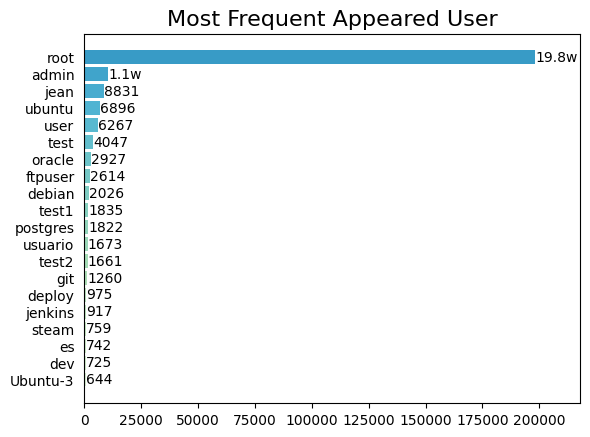

In [196]:
## this is implement for plot user count rank
import matplotlib.pyplot as plt
import numpy as np

DATA_COUNT = 20

def plot_user_count():
    data, text = load_data("dataset/extracted/user-count.log")

    x = data[:DATA_COUNT]
    x.reverse()
    y = text[:DATA_COUNT]
    y.reverse()


    cmap = plt.get_cmap('GnBu')
    colors = cmap(np.linspace(0.2, 0.7, DATA_COUNT))
    plt.barh(y, x, color=colors)

    for i in range(len(y)):
        plt.text(x[i], y[i], format_num(x[i]), ha='left', va='center')

    plt.title("Most Frequent Appeared User", fontsize=16)
    plt.xlim(0, x[-1] * 1.1)
    plt.tick_params(bottom=True, top=False, left=False, right=False)

plot_user_count()
plt.show()

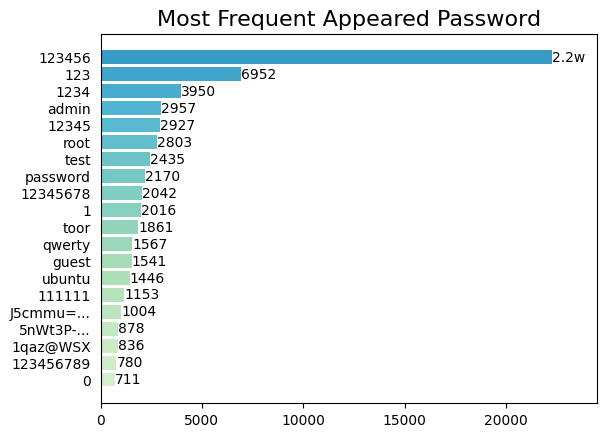

In [217]:
## this is implement for plot user count rank
import matplotlib.pyplot as plt

DATA_COUNT = 20

def plot_password_count():
    data, text = load_data("dataset/extracted/password-count.log")

    x = data[:DATA_COUNT]
    x.reverse()
    y = [format_str(x) for x in  text[:DATA_COUNT]]
    y.reverse()

    cmap = plt.get_cmap('GnBu')
    colors = cmap(np.linspace(0.2, 0.7, DATA_COUNT))
    plt.barh(y,x, color=colors)

    for i in range(len(y)):
        plt.text(x[i], y[i], format_num(x[i]), ha='left', va='center')

    plt.title("Most Frequent Appeared Password", fontsize=16)
    plt.xlim(0, x[-1] * 1.1)
    plt.tick_params(bottom=True, top=False, left=False, right=False)

plot_password_count()
plt.show()

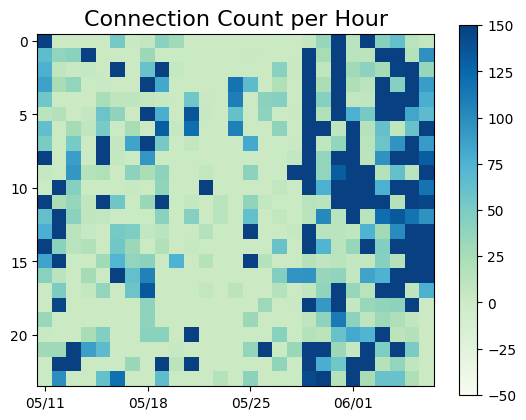

In [185]:
## this is implement for plot user count rank
import matplotlib.pyplot as plt

def plot_day_hour_count(start, end, vmin, vmax):    
    
    days = []
    data = [[0 for _ in range(57)] for _ in range(24)]
    with open("dataset/extracted/day-hour-count.log", encoding='utf-8') as f:
        lines = f.readlines()
        day_count = -1
        for line in lines:
            t = line.strip().split(" ")
            if len(t) >= 3:
                count, day, hour = int(t[0]), t[1], int(t[2])
                if day not in days:
                    day_count += 1
                    days.append(day)
                data[hour][day_count] = count

    filter_data = [x[start:end] for x in data]
    days = [x for x in days[start:end]]

    im = plt.imshow(filter_data, cmap=plt.get_cmap('GnBu'), vmin=vmin, vmax=vmax)
    x = [i for i in range(0, len(filter_data[0]), 7)]
    labels = [days[i][-5:] for i in x]
    plt.xticks(x, labels)

    #增加右侧的颜色刻度条
    plt.colorbar(im)
    # plt.xticks(rotation=30)
    #增加标题
    plt.title("Connection Count per Hour", fontsize=16)

# plot_day_hour_count(1, 30, -100, 500)
plot_day_hour_count(29, 56, -50, 150)
plt.show()

20


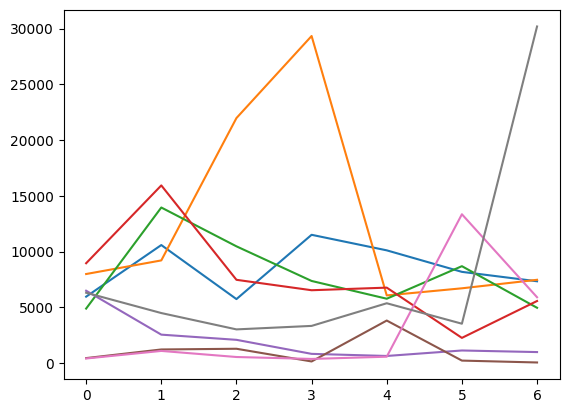

In [134]:
## this is implement for plot user count rank
import matplotlib.pyplot as plt

DATA_COUNT = 20

def plot_password_count_day():
    data, text = load_data("dataset/extracted/day-count.log")

    x = data[:DATA_COUNT]
    y = [format_str(x) for x in  text[:DATA_COUNT]]

    print(len(x))
    for i in range(0, len(data), 7):
        plt.plot([pos for pos in range(7)], data[i: i+7])

    # plt.title("Most Frequent Appeared Password")
    # plt.xlim(0, x[-1] * 1.1)
    # plt.tick_params(bottom=True, top=False, left=False, right=False)

plot_password_count_day()
plt.show()

1163
['2024/05/10', '2024/05/10', '2024/05/10', '2024/05/11', '2024/05/11', '2024/05/11', '2024/05/11', '2024/05/11', '2024/05/11', '2024/05/11', '2024/05/11', '2024/05/11', '2024/05/11', '2024/05/11', '2024/05/11', '2024/05/11', '2024/05/11', '2024/05/11', '2024/05/11', '2024/05/11', '2024/05/11', '2024/05/11', '2024/05/11', '2024/05/11', '2024/05/12', '2024/05/12', '2024/05/12', '2024/05/12', '2024/05/12', '2024/05/12', '2024/05/12', '2024/05/12', '2024/05/12', '2024/05/12', '2024/05/12', '2024/05/12', '2024/05/12', '2024/05/12', '2024/05/12', '2024/05/12', '2024/05/12', '2024/05/12', '2024/05/12', '2024/05/12', '2024/05/12', '2024/05/13', '2024/05/13', '2024/05/13', '2024/05/13', '2024/05/13', '2024/05/13', '2024/05/13', '2024/05/13', '2024/05/13', '2024/05/13', '2024/05/13', '2024/05/13', '2024/05/13', '2024/05/13', '2024/05/13', '2024/05/13', '2024/05/14', '2024/05/14', '2024/05/14', '2024/05/14', '2024/05/14', '2024/05/14', '2024/05/14', '2024/05/14', '2024/05/14', '2024/05/14', 

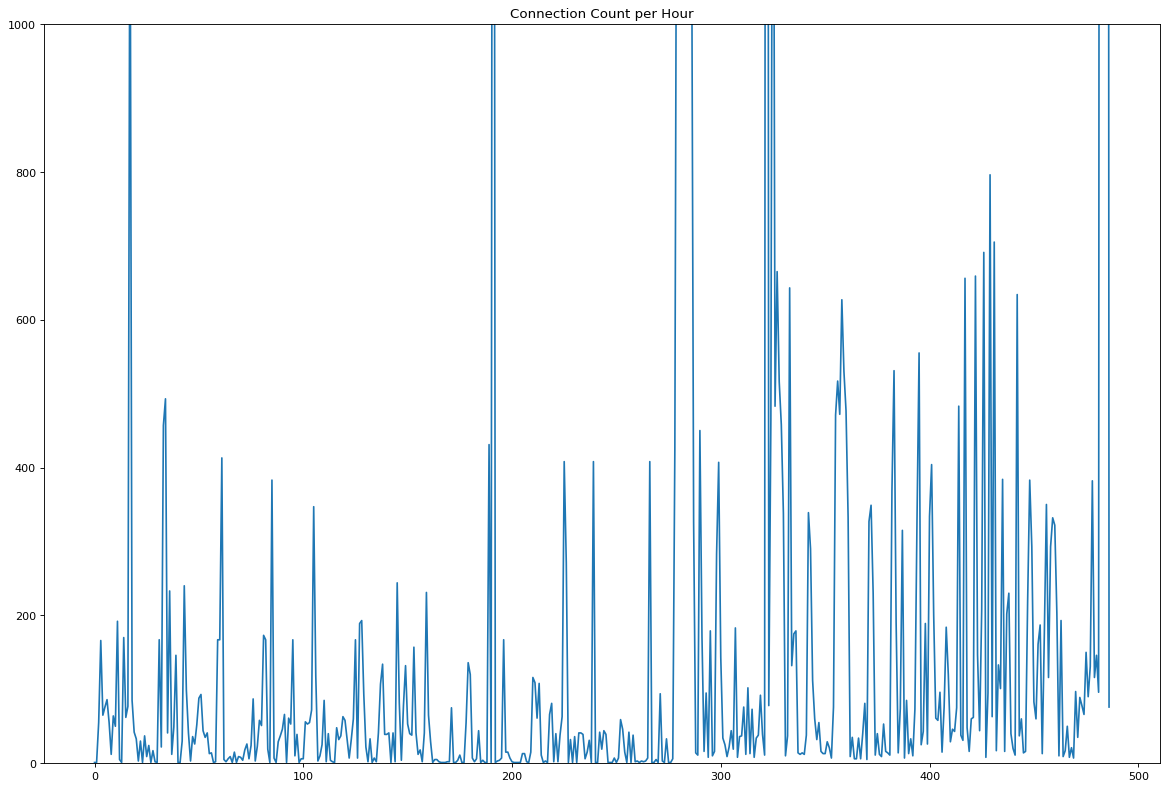

In [136]:
## this is implement for plot user count rank
import matplotlib.pyplot as plt

def plot_time_count_line():    
    data, text = load_data("dataset/extracted/day-hour-count.log")
    print(len(data))

    START = 676
    END = 1164
    x = text[START:END]
    y = data[START:END]
    print(x)
    print(y)
    plt.figure(figsize=(18,12),dpi = 80)
    plt.plot([z for z in range(len(y))], y)
    plt.ylim(0, 1000)
    plt.title("Connection Count per Hour")

plot_time_count_line()
plt.show()

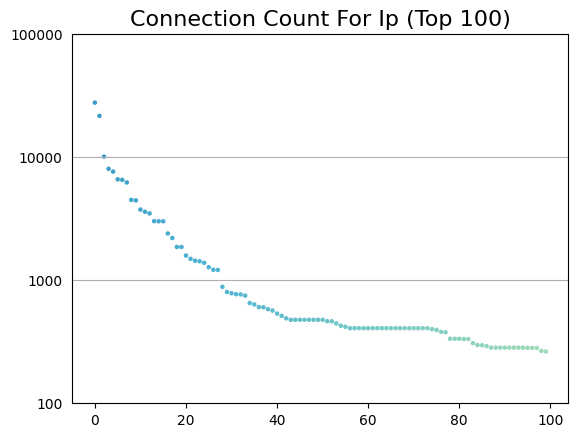

In [231]:
## this is implement for plot user count rank
import matplotlib.pyplot as plt
import math


def plot_ip_count():
    
    DATA_COUNT = 100
    data, _ = load_data("dataset/extracted/ip-count.log")

    y = [math.log(i, 10) for i in data[:DATA_COUNT]]
    x = [i for i in range(DATA_COUNT)]

    cmap = plt.get_cmap('GnBu')
    colors = cmap(np.linspace(0.7, 0.4, DATA_COUNT))
    plt.scatter(x, y, color=colors, s=5)

    plt.title("Connection Count For Ip (Top 100)", fontsize=16)
    plt.ylim(2, 5)
    plt.tick_params(bottom=True, top=False, left=False, right=False)
    plt.grid(True, axis='y')
    yticks = [2.0, 3.0, 4.0, 5.0]
    plt.yticks(yticks, tuple([int(10 ** i) for i in yticks]))
    # plt.xticks([])
    
plot_ip_count()
plt.show()

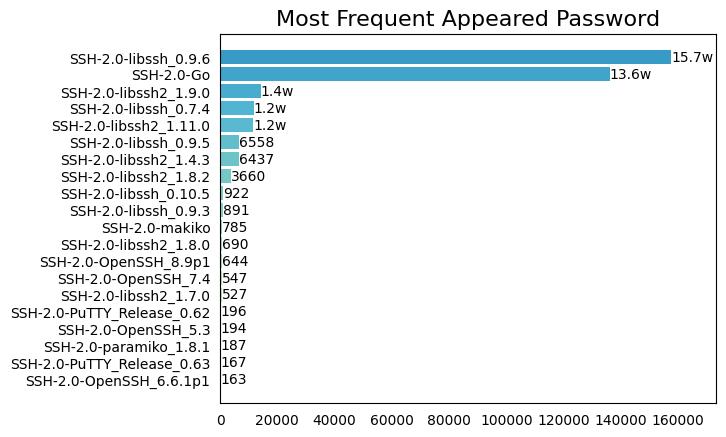

In [227]:
## this is implement for plot user count rank
import matplotlib.pyplot as plt

DATA_COUNT = 20

def plot_client_count():
    data, text = load_data("dataset/extracted/client-count.log")

    x = data[:DATA_COUNT]
    x.reverse()
    y = [x for x in  text[:DATA_COUNT]]
    y.reverse()

    cmap = plt.get_cmap('GnBu')
    colors = cmap(np.linspace(0.2, 0.7, DATA_COUNT))
    plt.barh(y,x, color=colors)

    for i in range(len(y)):
        plt.text(x[i], y[i], format_num(x[i]), ha='left', va='center')

    plt.title("Most Frequent Appeared Password", fontsize=16)
    plt.xlim(0, x[-1] * 1.1)
    plt.tick_params(bottom=False, top=False, left=False, right=False)

plot_client_count()
plt.show()

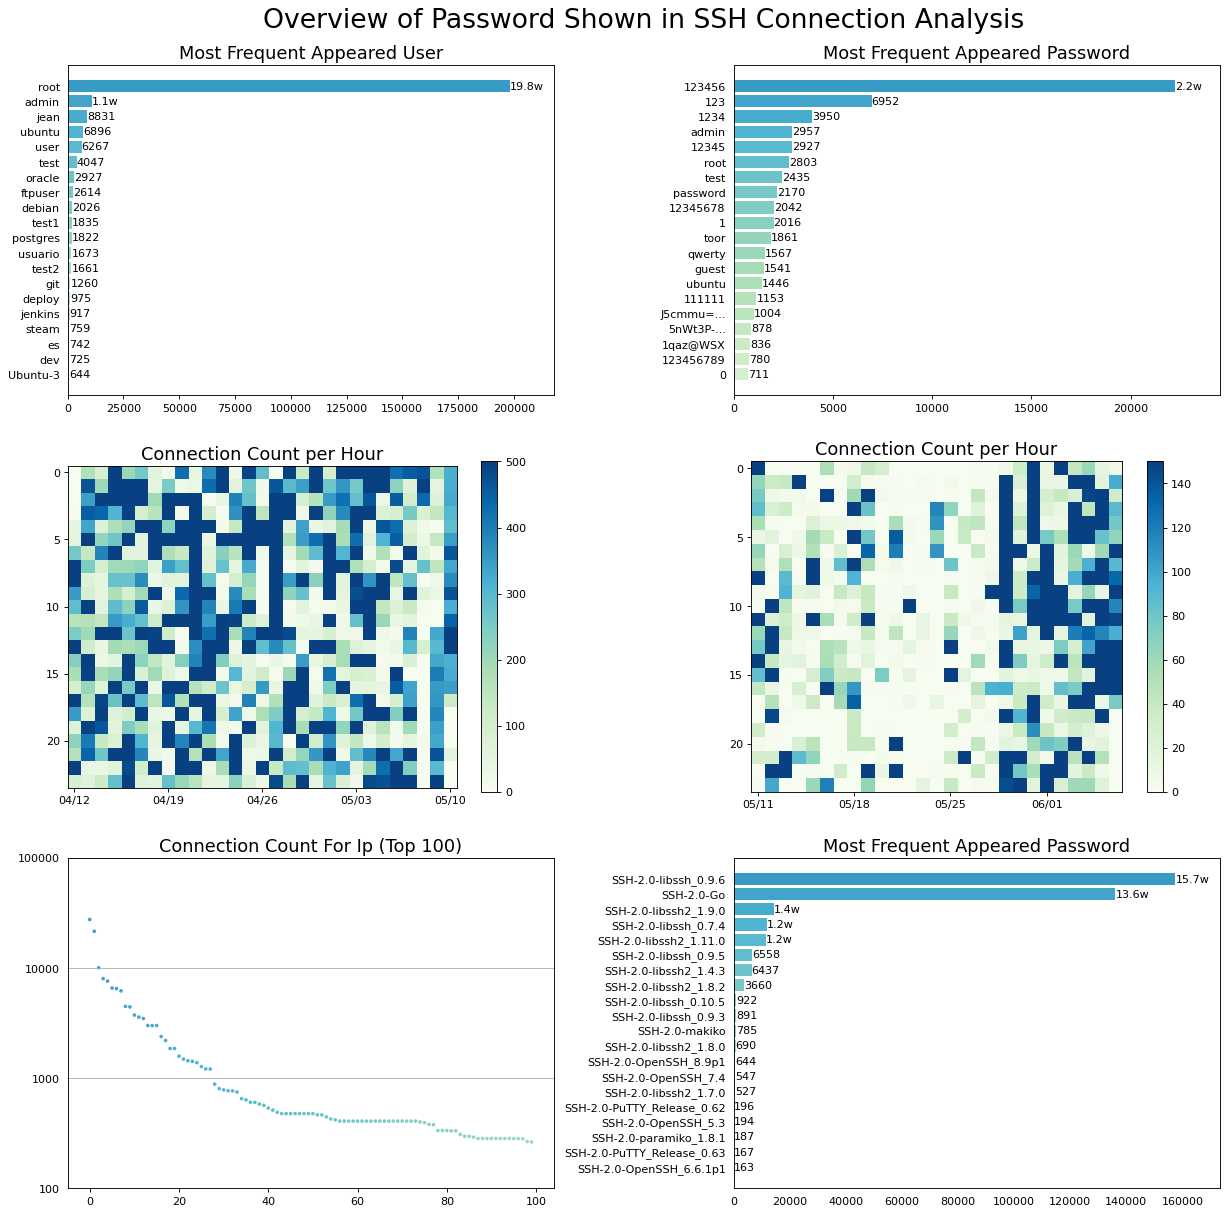

In [232]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(18,18),dpi = 80)

#plot 1:

plt.subplot(3, 2, 1)
plot_user_count()

#plot 2:
plt.subplot(3, 2, 2)
plot_password_count()

#plot 3:
plt.subplot(3, 2, 3)
plot_day_hour_count(0, 29, 0, 500)

#plot 4:
plt.subplot(3, 2, 4)
plot_day_hour_count(29,56, 0, 150)

#plot 5:
plt.subplot(3, 2, 5)
plot_ip_count()

# #plot 6:
plt.subplot(3, 2, 6)
# plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plot_client_count()

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.88, 
                    wspace=0.37, 
                    hspace=0.2)

plt.suptitle("Overview of Password Shown in SSH Connection Analysis", y=0.92, fontsize=24)
plt.show()